# Analyse des données sur les praticiens

Sources: https://www.data.gouv.fr/fr/datasets/annuaire-sante-de-la-cnam

In [2]:
import pandas as pd
import numpy as np

## Analyse du jeu de données des professionnels de santé (PS) en établissement

In [3]:
data = pd.read_csv("../data/psdansetablissements.csv", sep=";", header=None)
data.rename(columns={
    0:"Nom", 
    1: "Adresse ligne 1", 
    2:"Adresse ligne 2", 
    3:"Adresse ligne 3", 
    4:"Code postal", 
    5:"Commune", 
    6:"Téléphone", 
    7:"Type", 
    8:"Nom PS", 
    9:"Prénom du PS", 
    10:"cat_pro"}, inplace=True)
data.head()

,Nom,Adresse ligne 1,Adresse ligne 2,Adresse ligne 3,Code postal,Commune,Téléphone,Type,Nom PS,Prénom du PS,cat_pro
0,CLINIQUE DU PARC IMPERIAL,NaN,28 BOULEVARD TZAREWITCH,NaN,6045,NICE CEDEX 1,492077575.0,2,DESANTIS,MARIANGELA,17
1,CLINIQUE DU PARC IMPERIAL,NaN,28 BOULEVARD TZAREWITCH,NaN,6045,NICE CEDEX 1,492077575.0,2,BENCHETRIT,MAXIME,2
2,CLINIQUE DU PARC IMPERIAL,NaN,28 BOULEVARD TZAREWITCH,NaN,6045,NICE CEDEX 1,492077575.0,2,CLOUET D ORVAL,BENOIT,12
3,CLINIQUE DU PARC IMPERIAL,NaN,28 BOULEVARD TZAREWITCH,NaN,6045,NICE CEDEX 1,492077575.0,2,GLASSON,JEAN MARC,12
4,CLINIQUE DU PARC IMPERIAL,NaN,28 BOULEVARD TZAREWITCH,NaN,6045,NICE CEDEX 1,492077575.0,2,JOURNEL,BERTRAND,2


## Analyse du jeu de données des professionnels de santé

In [4]:
data = pd.read_csv("../data/ps-infospratiques.csv", sep=";", header=None, encoding="latin_1")
data.rename(columns={
    0:"Sexe", 
    1:"nom", 
    2:"prenom", 
    3:"Adresse ligne 1,", 
    4:"Adresse ligne 2",
    5:"Adresse ligne 3",
    6:"Adresse ligne 4",
    7:"CP", ## un numéro qui sembl être un CP (mais des soucis avec les 2 ... (?))
    8:"Ville",
    9:"Téléphone", 
    10:"Profession", #code de profession (voir nommenclature ci-dessous)
    11:"mode", #mode d'exercice
    12:"nature", #nature d'exercice
    13:"convention", 
    14:"option contrat", 
    15:"sesam_vital", 
    16:"Type", # Liberal/hors activité, etc.
    17:"Type consultation", 
    18:"heure_debut", 
    19:"heure_debut",
    20:"jour"}, inplace=True)
data.head()

/home/tguyet/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3062: DtypeWarning: Columns (16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Sexe,nom,prenom,"Adresse ligne 1,",Adresse ligne 2,Adresse ligne 3,Adresse ligne 4,CP,Ville,Téléphone,...,mode,nature,convention,option contrat,sesam_vital,Type,Type consultation,heure_debut,heure_debut,jour
0,F,CUGNIET,ODILE,NaN,NaN,35 RUE CENTRALE,NaN,1230,TENAY,NaN,...,NaN,3,c1,N,O,NaN,NaN,NaN,NaN,NaN
1,H,TANAZACQ,REMI,NaN,NaN,1 ROUTE DE CHAMOISE,NaN,1430,ST MARTIN DU FRENE,NaN,...,NaN,3,c1,O,O,NaN,NaN,NaN,NaN,NaN
2,H,HOJABR,AMIR THEODORE,NaN,NaN,76 RUE GRANDE,NaN,1220,DIVONNE LES BAINS,971169655.0,...,NaN,3,c3,N,O,NaN,NaN,NaN,NaN,NaN
3,H,HOJABR,AMIR THEODORE,NaN,CLINIQUE CENDANEG,180 ROUTE DU NANT,NaN,1280,PREVESSIN MOENS,NaN,...,NaN,3,c3,N,O,NaN,NaN,NaN,NaN,NaN
4,F,ADAM,EMILIE,NaN,NaN,180 ROUTE DU NANT,NaN,1280,PREVESSIN MOENS,NaN,...,NaN,3,c3,N,O,NaN,NaN,NaN,NaN,NaN


In [5]:
data[(data['Ville']=="RENNES") & (data['Type']!=0) & (data['Type']!=6) & (data['Type']!=7) & (data['Type']!=8) ]

,Sexe,nom,prenom,"Adresse ligne 1,",Adresse ligne 2,Adresse ligne 3,Adresse ligne 4,CP,Ville,Téléphone,...,mode,nature,convention,option contrat,sesam_vital,Type,Type consultation,heure_debut,heure_debut,jour
136468,F,MORFOISSE GUINET,LAURENCE,NaN,NaN,2 RUE DU CAPITAINE MAIGNAN,NaN,35000,RENNES,299783826.0,...,NaN,3,c1,N,O,NaN,NaN,NaN,NaN,NaN
136469,H,MEUNIER,BERNARD,NaN,C.H.R. PONTCHAILLOU,2 RUE HENRI LE GUILLOUX,NaN,35033,RENNES,NaN,...,NaN,5,c3,O,NaN,NaN,NaN,NaN,NaN,NaN
136577,F,LANGLAIS,LUCILE,CABINET DU DR LUCILE LANGLAIS,NaN,46 BOULEVARD DE CLEUNAY,NaN,35000,RENNES,223408181.0,...,NaN,3,c1,N,O,NaN,NaN,NaN,NaN,NaN
136579,H,TOUBEL,GERARD,NaN,NaN,34 PLACE DES LICES,NaN,35000,RENNES,299317158.0,...,NaN,2,c1,N,O,NaN,NaN,NaN,NaN,NaN
136583,H,FAVE,JEAN MARIE,NaN,NaN,127 RUE D'ANTRAIN,NaN,35000,RENNES,299368616.0,...,NaN,3,c1,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1145726,F,ISMAIL JOUBREL,DINA,NaN,NaN,6 RUE D ARGENTRE,NaN,35000,RENNES,299518550.0,...,NaN,2,c3,O,O,ca,non_r,09:30,19:30,3.0
1145727,F,ISMAIL JOUBREL,DINA,NaN,NaN,6 RUE D ARGENTRE,NaN,35000,RENNES,299518550.0,...,NaN,2,c3,O,O,ca,non_r,09:30,19:00,5.0
1145728,F,ISMAIL JOUBREL,DINA,NaN,NaN,6 RUE D ARGENTRE,NaN,35000,RENNES,299518550.0,...,NaN,2,c3,O,O,co,avc_rdv,09:30,20:00,1.0
1145729,F,ISMAIL JOUBREL,DINA,NaN,NaN,6 RUE D ARGENTRE,NaN,35000,RENNES,299518550.0,...,NaN,2,c3,O,O,co,avc_rdv,09:30,19:30,2.0


In [6]:
#Médecins libéraux exercant en ville dans le département 35
data35=data[(data['CP']//1000==35) & (data['Type']!=0) & (data['Type']!=6) & (data['Type']!=7) & (data['Type']!=8) ]
data35=data35[["Sexe","nom","prenom","CP","Ville","Profession"]].drop_duplicates()
#codage du sex selon la IR_SEX_COD
data35["Sexe"].fillna("9",inplace=True)
data35["Sexe"]=data35["Sexe"].str.replace(pat="F",repl="2")
data35["Sexe"]=data35["Sexe"].str.replace(pat="H",repl="1")
#suppression des CEDEX
data35["Ville"]=data35["Ville"].str.replace(pat=" CEDEX.*",repl="", regex=True)
data35

,Sexe,nom,prenom,CP,Ville,Profession
89287,9,AUB,NaN,35033,RENNES,26
136467,1,BIRON,YVES,35706,RENNES,6
136468,2,MORFOISSE GUINET,LAURENCE,35000,RENNES,45
136469,1,MEUNIER,BERNARD,35033,RENNES,7
136470,1,LE ROUX,FRANCOIS,35780,LA RICHARDAIS,45
...,...,...,...,...,...,...
1145709,1,MASSON,PHILIPPE,35160,LE VERGER,45
1145724,2,ISMAIL JOUBREL,DINA,35000,RENNES,65
1176557,1,VICTOR,FREDERIC,35300,FOUGERES,6
1176575,2,NOUVIALE,NADEGE,35580,BAULON,18


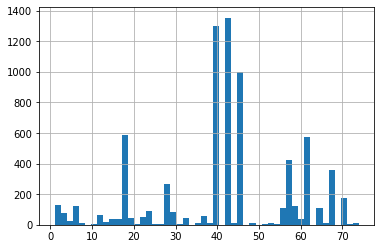

In [7]:
data35["Profession"].hist(bins=50)

### Nomenclatures pour les professionnels de santé

Types d'établissement
* vide : pas de type 
* 1 : Établissement public ou privé d’intérêt collectif 
* 2 : Établissement privé

Catégories des professionnels de santé (pas de liste identique dans SNDS)
* 1 : Ambulance /Véhicule sanitaire léger 
* 2 : Anatomo-Cyto-Pathologiste 
* 3 : Anesthésiste réanimateur
* 4 : Cancérologue  radiothérapeute 
* 5 : Cancérologue médical 
* 6 : Cardiologue 
* 7 : Chirurgien général
* 8 : Chirurgien infantile 
* 9 : Chirurgien maxillo-facial 
* 10 : Chirurgien maxillo-facial et stomatologiste 
* 11 : Chirurgien oral 
* 12 : Chirurgien orthopédiste et traumatologue 
* 13 : Chirurgien plasticien  
* 14 : Chirurgien thoracique et cardio-vasculaire 
* 15 : Chirurgien urologue 
* 16 : Chirurgien vasculaire
* 17 : Chirurgien viscéral 
* 18 : Chirurgien-dentiste 
* 19 : Chirurgien-dentiste spécialiste en orthopédie dento-faciale 
* 20 : Chirurgiens-dentistes spécialiste en chirurgie orale 
* 21 : Chirurgiens-dentistes spécialiste en médecine bucco-dentaire 
* 22 : Dermatologue et vénérologue 
* 23 : Endocrinologue-diabétologue 
* 24 : Fournisseur de matériel médical et para-médical 
* 25-32 : Fournisseur de matériel médical et para-médical
* 33 : Gastro-entérologue et hépatologue 
* 34 : Gériatre 
* 35 : Gynécologue médical  
* 36 : Gynécologue médical et obstétricien 
* 37 : Gynécologue obstétricien 
* 38 : Hématologue 
* 39 : Infirmier 
* 40 : Laboratoire 
* 41 : Laboratoire 
* 42 : Laboratoire d'anatomo-pathologie 
* 43 : Masseur-kinésithérapeute 
* 44 : Médecin biologiste 
* 45-47 : Médecin généraliste
* 48 : Médecin généticien 
* 49 : Médecin spécialiste en médecine nucléaire 
* 50 : Médecin spécialiste en santé publique et médecine sociale 
* 51 : Néphrologue 
* 52 : Neurochirurgien 
* 53 : Neurologue 
* 54 : Neuropsychiatre 
* 55 : Obstétricien 
* 56 : Ophtalmologiste 
* 57 : Orthophoniste 
* 58 : Orthoptiste 
* 59 : Oto-Rhino-Laryngologue (ORL) et chirurgien cervico-facial 
* 60 : Pédiatre 
* 61 : Pédicure-podologue 
* 62 : Pharmacien 
* 63 : Pharmacien 
* 64 : Pneumologue 
* 65 : Psychiatre 
* 66 : Psychiatre de l'enfant et de l'adolescent 
* 67 : Radiologue 
* 68 : Radiothérapeute 
* 69 : Réanimateur médical 
* 70 : Rhumatologue 
* 71 : Sage-femme 
* 72 : Spécialiste en médecine interne 
* 73 : Spécialiste en médecine physique et de réadaptation 
* 74 : Stomatologiste

Mode exercice:
* 1 : Acupuncteur  
* 2 : Allergologue  
* 3 : Angiologue 
* 4 : Echographiste 
* 5 : Homéopathe 
* 6 : Médecin thermaliste 
* 7 : Médecine appliquée aux sports 
* 8 : Phoniatre 

Nature exercice:
* 1 : N’exerce pas actuellement 
* 2 : Libéral activité salariée 
* 3 : Libéral intégral 
* 4 : Libéral temps partiel hospitalier 
* 5 : Libéral temps plein hospitalier 
* 6 : Pharmacie mutualiste 
* 7 : T. plein hosp. contrat mixte 
* 8 : T. plein hosp./mal. aut. med.

Convention 
* nc Non conventionné  
* c1 Secteur 1 ou conventionné  
* c2 Secteur 1 ou conventionné avec droit au dépassement permanent  
* c3 Secteur 2

Type d'activité
* co : plage horaire de consultation
* ca : plage horaire d’activité du cabinet 

Type de consultation : 
* vide ou non_r : non renseigné 
* avc_rdv : avec rendez-vous 
* ss_rdv : sans rendez-vous 
* a_dom : à domicile 

In [8]:
#definition d'une table de correspondance entre les codes professionnelles (du jeu des données de PS) et du codage des spécialités dans le SNDS (table IR_SPA_COD)
# si pas d'entrée dans cette map, alors mettre la valeur '0' (non défini)

catprof_SPACOD={45:1,3:2,6:3,7:4,22:5,67:6,37:7,33:8,72:9,52:10,59:11,60:12,64:13,70:14,56:15,15:16,54:17,74:18,18:19,69:20,71:21,46:22,47:23,39:24,43:26,61:27,57:28,58:29,40:30,73:31,53:32,65:33,34:34,51:35,19:36,2:37,41:39,42:40,12:41,23:42,8:43,9:44,10:45,13:46,14:47,16:48,17:49,62:50,62:51,63:52,18:53,19:54,1:55,24:60,25:61,26:62,27:63,28:64,29:65,30:66,31:67,32:68,11:69,35:70,38:71,49:72,5:73,4:74,66:75,68:76,55:77,48:78,36:79,50:80,69:83}


In [11]:
catprof_SPACOD[46]

22

In [67]:
dpts=[35,22]
datadpt=data[(data['CP']//1000==int(dpts[0])) & (data['Type']!=0) & (data['Type']!=6) & (data['Type']!=7) & (data['Type']!=8) ]
for dpt in dpts[1:]:
    datadpt = pd.concat( (datadpt, data[(data['CP']//1000==int(dpt)) & (data['Type']!=0) & (data['Type']!=6) & (data['Type']!=7) & (data['Type']!=8) ]))
        

In [68]:
datadpt

,Sexe,nom,prenom,"Adresse ligne 1,",Adresse ligne 2,Adresse ligne 3,Adresse ligne 4,CP,Ville,Téléphone,...,mode,nature,convention,option contrat,sesam_vital,Type,Type consultation,heure_debut,heure_debut,jour
89287,NaN,AUB,NaN,AUB,HOPITAL PONTCHAILLOU,NaN,NaN,35033,RENNES CEDEX,299540286.0,...,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
136467,H,BIRON,YVES,POLYCLINIQUE ST LAURENT,CS 10610,320 AVENUE PATTON,NaN,35706,RENNES CEDEX 7,299256520.0,...,NaN,3,c1,N,NaN,NaN,NaN,NaN,NaN,NaN
136468,F,MORFOISSE GUINET,LAURENCE,NaN,NaN,2 RUE DU CAPITAINE MAIGNAN,NaN,35000,RENNES,299783826.0,...,NaN,3,c1,N,O,NaN,NaN,NaN,NaN,NaN
136469,H,MEUNIER,BERNARD,NaN,C.H.R. PONTCHAILLOU,2 RUE HENRI LE GUILLOUX,NaN,35033,RENNES,NaN,...,NaN,5,c3,O,NaN,NaN,NaN,NaN,NaN,NaN
136470,H,LE ROUX,FRANCOIS,CABINET DU DR FRANCOIS LE ROUX,NaN,3 RUE JEAN LANGLAIS,NaN,35780,LA RICHARDAIS,299885537.0,...,NaN,3,c1,N,O,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136604,H,LE HENAFF,OLIVIER,NaN,NaN,61 RUE DE GOUEDIC,NaN,22000,ST BRIEUC,296332824.0,...,NaN,3,c1,N,O,co,avc_rdv,14:00,19:00,4.0
1136605,H,LE HENAFF,OLIVIER,NaN,NaN,61 RUE DE GOUEDIC,NaN,22000,ST BRIEUC,296332824.0,...,NaN,3,c1,N,O,co,avc_rdv,09:00,13:00,5.0
1136606,H,LE HENAFF,OLIVIER,NaN,NaN,61 RUE DE GOUEDIC,NaN,22000,ST BRIEUC,296332824.0,...,NaN,3,c1,N,O,co,avc_rdv,14:00,19:00,5.0
1176508,NaN,PHAR MAC GARRY LORINQUER,NaN,PHAR MAC GARRY LORINQUER,NaN,CORNICHE DE LANDRELLEC,NaN,22560,PLEUMEUR BODOU,296153050.0,...,NaN,3,NaN,NaN,O,NaN,NaN,NaN,NaN,NaN


In [69]:
for index, ps in datadpt:
    print(ps['Profession'])

TypeError: string indices must be integers